In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons
import time
import pprint
from sklearn.metrics import accuracy_score

In [2]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

In [3]:
# title for the plots
svm_types = ('Linear kernel',
          'LinearSVC',
          'RBF(0.7)',
          'RBF(0.1)',
          'Poly (3)',
          'Poly (4)')

times_fit = {svm_type:[] for svm_type in svm_types}
times_pred = {svm_type:[] for svm_type in svm_types}
accuracy = {svm_type:[] for svm_type in svm_types}

# each dict has a name: {n:[fit, pred]}

In [4]:
C = 1.0  # SVM regularization parameter
maxi = 5000
models = (svm.SVC(kernel='linear', C=C, max_iter= maxi),
          svm.LinearSVC(C=C, max_iter=maxi),
          svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter= maxi),
          svm.SVC(kernel='rbf', gamma=0.1, C=C, max_iter= maxi),
          svm.SVC(kernel='poly', degree=3, C=C, max_iter= maxi),
          svm.SVC(kernel='poly', degree=4, C=C, max_iter= maxi))

# models = (clf.fit(X, y) for clf in models)




In [5]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [6]:
SEED = 1
# n = 100

In [7]:
centers = [(0, -5), (-7, 0), (0, 5), (-2, 0)]
# X, y_true = make_blobs(n_samples=n, centers=centers,
#                        cluster_std=.9, random_state=SEED)
# kmeans = KMeans(4, random_state=SEED)
# labels = kmeans.fit(X).predict(X)

In [8]:
# make four classes into 2:
# labels = [0 if x==1 or x==3 else 1 for x in y_true]


In [9]:
# plt.scatter(X[:, 0], X[:, 1],s=5, c=labels, linewidths=0, cmap='viridis')
# plt.show()

In [10]:
# (x_train, x_test, y_train, y_test) = train_test_split(
#     X, labels, test_size=0.2, random_state=SEED, stratify=labels)


In [11]:
#####3

In [12]:
fig, sub = plt.subplots(3, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.8)

/Users/gilikarni/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/gilikarni/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/gilikarni/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


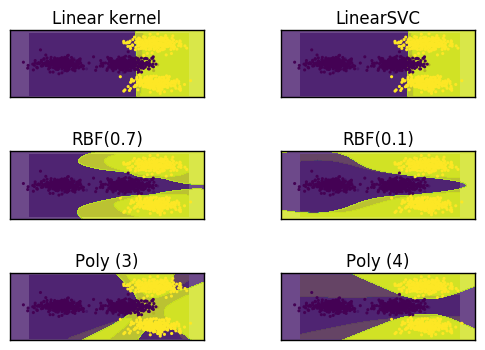

In [13]:
# X0, X1 = X[:, 0], X[:, 1]
# xx, yy = make_meshgrid(X0, X1)
# n_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
n_sizes = [100,1000]
for n in n_sizes:
    
    X, y_true = make_blobs(n_samples=n, centers=centers,
                       cluster_std=.9, random_state=SEED)
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    labels = [0 if x==1 or x==3 else 1 for x in y_true]

    (x_train, x_test, y_train, y_test) = train_test_split(
    X, labels, test_size=0.2, random_state=SEED, stratify=labels)
    
    
    for model, title, ax in zip(models, svm_types, sub.flatten()):
#     print title
    
        start_fit = time.time()
        clf = model.fit(x_train, y_train)
        end_fit = time.time()


#     print "fit time : {}".format(end_fit-start_fit)
    
    
        start_pred = time.time()
        y_pred = model.predict(x_test)
        end_pred = time.time()
    
#     print "prediction time : {}".format(end_pred-start_pred)
#     print classification_report(y_test, y_pred)
#     print
    
        times_fit[title].append(end_fit-start_fit)
        times_pred[title].append(end_pred-start_pred)
        accuracy[title].append(accuracy_score(y_test, y_pred))

        plot_contours(ax, clf, xx, yy,
                      cmap='viridis', alpha=0.8)


        ax.scatter(X0, X1, c=labels, cmap='viridis', s=5, linewidths=0)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

plt.show()

In [31]:
colors = plt.cm.rainbow(np.linspace(0, 1, 8))


In [15]:
log_x, log_y = np.log(n_sizes), np.log(times_fit[svm_type])
print times_fit[svm_type]
print len(log_x),len(log_y)
np.polyfit(log_x, log_y, 2)

NameError: name 'svm_type' is not defined

In [33]:
for i,svm_type in enumerate(svm_types):
    
    log_x, log_y = np.log(n_sizes), np.log(times_fit[svm_type])
    coef =  np.polyfit(log_x, log_y, 1)[0]
    plt.plot(log_x, [coef*i for i in log_y])
    plt.scatter(log_x, log_y, s=10, linewidths=0, c = colors[i])#, label=svm_type)

    
plt.title('fitting time loglog plot')    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

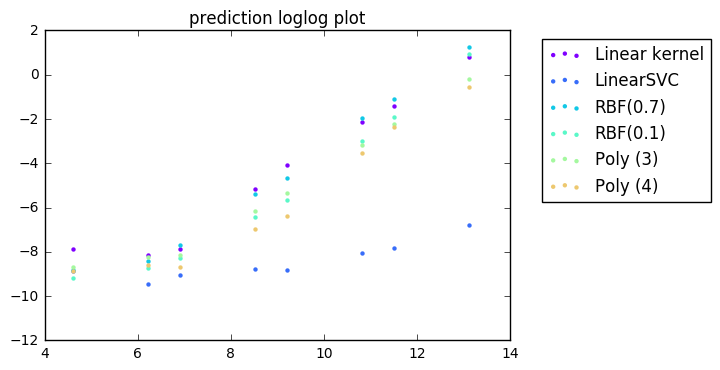

In [64]:
for i,svm_type in enumerate(svm_types):
   
    plt.scatter(np.log(n_sizes),np.log(times_pred[svm_type]), s=10, linewidths=0, c= colors[i],label=svm_type)

    
plt.title('prediction loglog plot')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)   
plt.show()

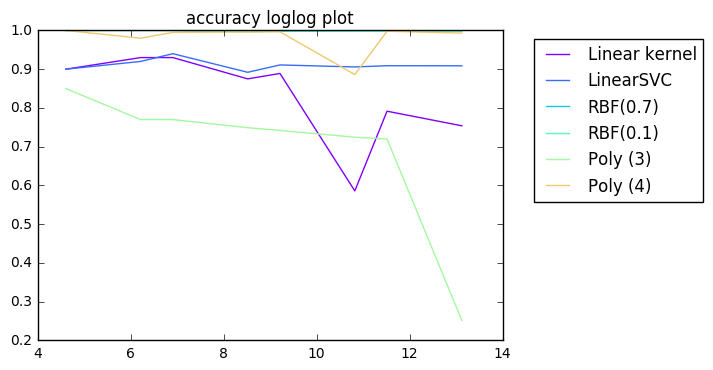

In [65]:
for i,svm_type in enumerate(svm_types):
   
    plt.plot(np.log(n_sizes),accuracy[svm_type], c= colors[i],label=svm_type)

    
plt.title('accuracy loglog plot')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)   
plt.show()

In [36]:
colors = plt.cm.get_cmap('hsv', 4)

TypeError: 'LinearSegmentedColormap' object does not support indexing